In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Define matrices and vectors
V_T = np.array([[-2.69, -2.80], [-3.39, -4.56]])
b_v = np.array([-2.21, 4.76])
W = np.array([-4.91, 4.95])
b_w = -2.28

In [4]:
# Define the three activation functions
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def hard_limit_activation(x):
    return np.where(x >= 0, 1, 0)

def rbf_activation(x):
    return np.exp(-x**2)

In [12]:
# Function to plot output surfaces for all activation functions and given number of samples
def plot_combined_output_surfaces(num_samples_list):
    activation_functions = [sigmoid_activation, hard_limit_activation, rbf_activation]
    fig, axs = plt.subplots(len(activation_functions), len(num_samples_list), figsize=(15, 15), 
                            subplot_kw={'projection': '3d'})
    
    for i, num_samples in enumerate(num_samples_list):
        for j, activation_function in enumerate(activation_functions):
            # Generate sample points in the domain [-2, 2] x [-2, 2]
            x1 = np.linspace(-2, 2, int(np.sqrt(num_samples)))
            x2 = np.linspace(-2, 2, int(np.sqrt(num_samples)))
            X1, X2 = np.meshgrid(x1, x2)
            
            # Initialize the output array
            Y = np.zeros_like(X1)
            
            # Calculate the output y for each combination of inputs x1, x2 using the specified activation function
            for m in range(X1.shape[0]):
                for n in range(X1.shape[1]):
                    x = np.array([X1[m, n], X2[m, n]])
                    a = np.dot(V_T, x) + b_v
                    h = activation_function(a)
                    Y[m, n] = np.dot(W, h) + b_w
            
            # Plotting
            ax = axs[j, i]
            ax.plot_surface(X1, X2, Y, cmap='viridis')
            ax.set_xlabel('x1')
            ax.set_ylabel('x2')
            ax.set_zlabel('y')
            ax.set_title(f'{activation_function.__name__} ({num_samples} samples)')
    
    plt.tight_layout()
    plt.show()

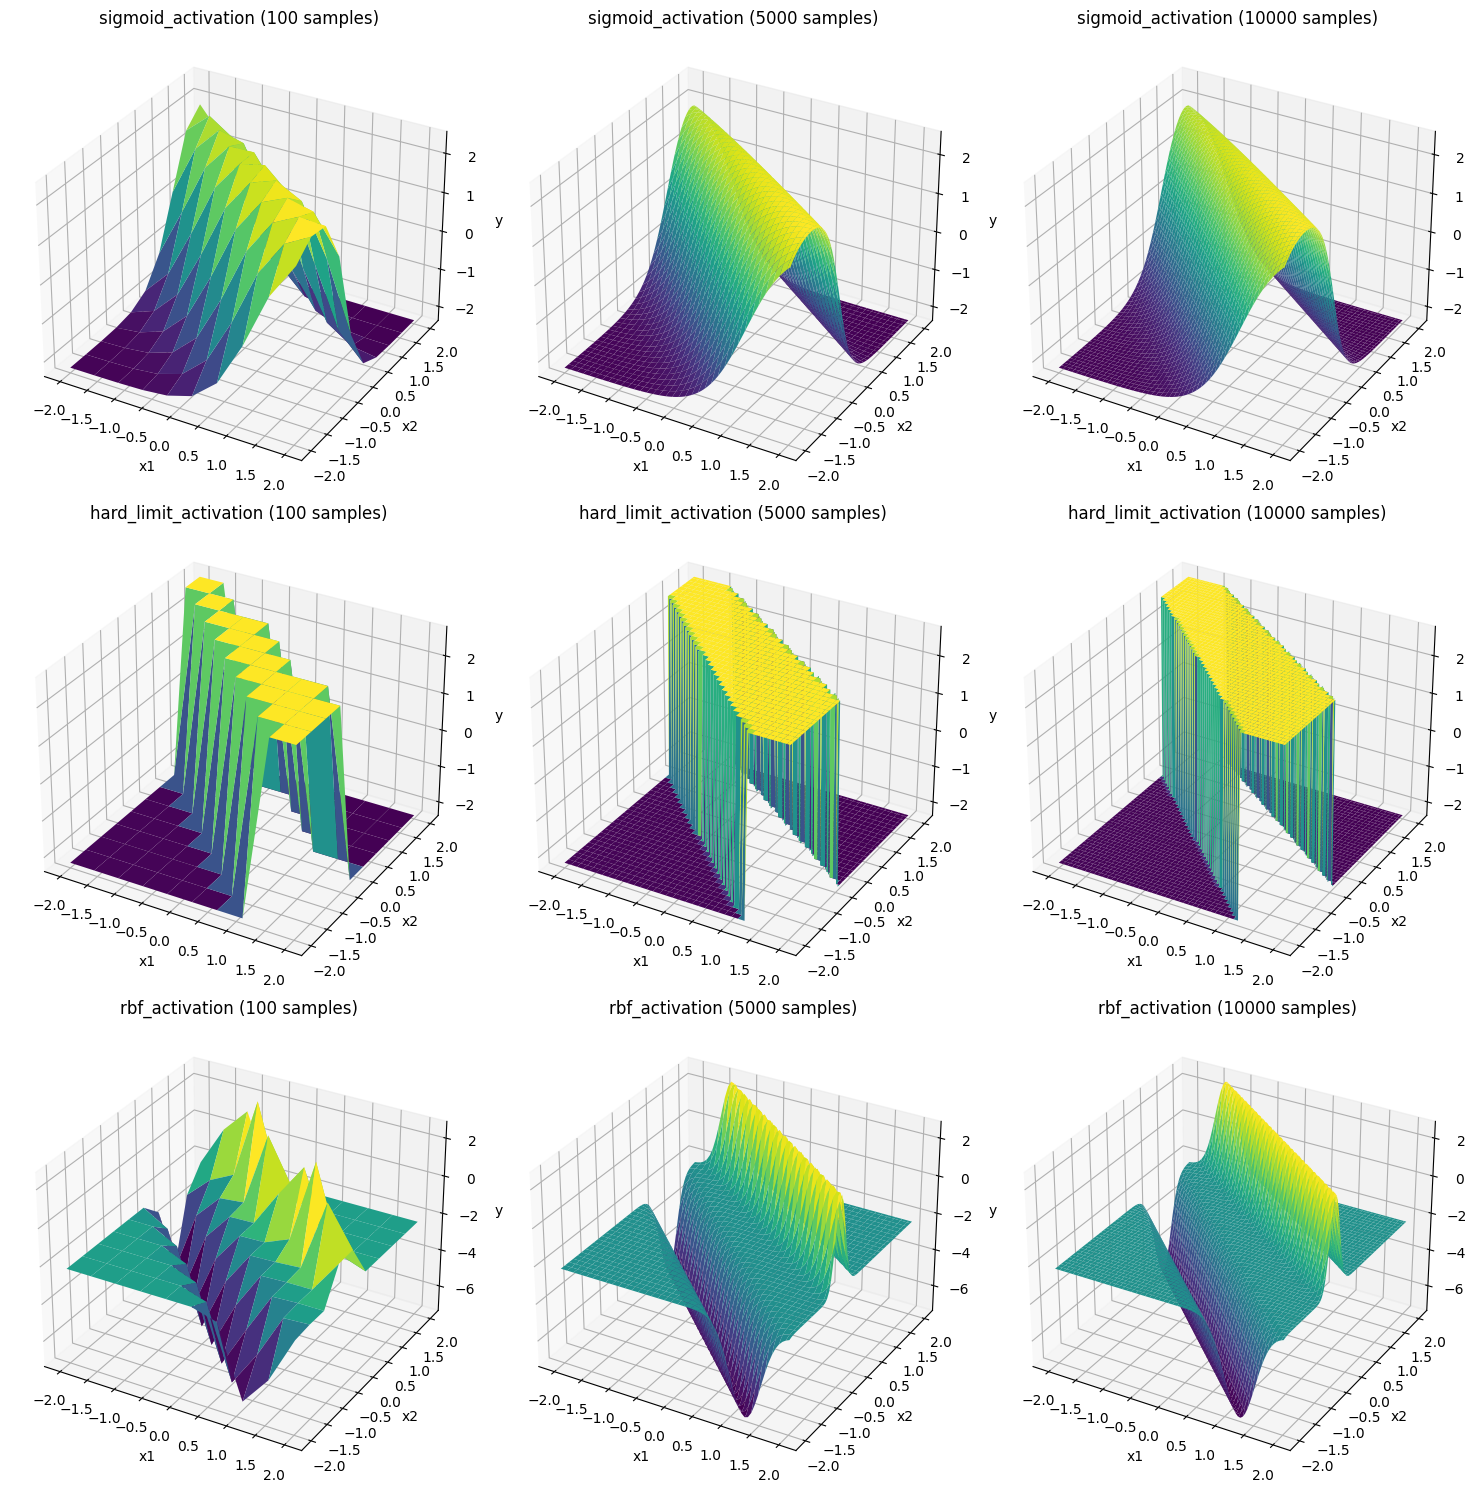

In [13]:
plot_combined_output_surfaces([100, 5000, 10000])